In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot





In [33]:
# Initialize Plotly
init_notebook_mode(connected=True)

In [34]:
# Download historical stock data
data = yf.download("AAPL", start="2018-01-01", end="2024-07-01")



[*********************100%%**********************]  1 of 1 completed


In [35]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615891,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608822,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797447,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261940,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108673,82271200
...,...,...,...,...,...,...
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200


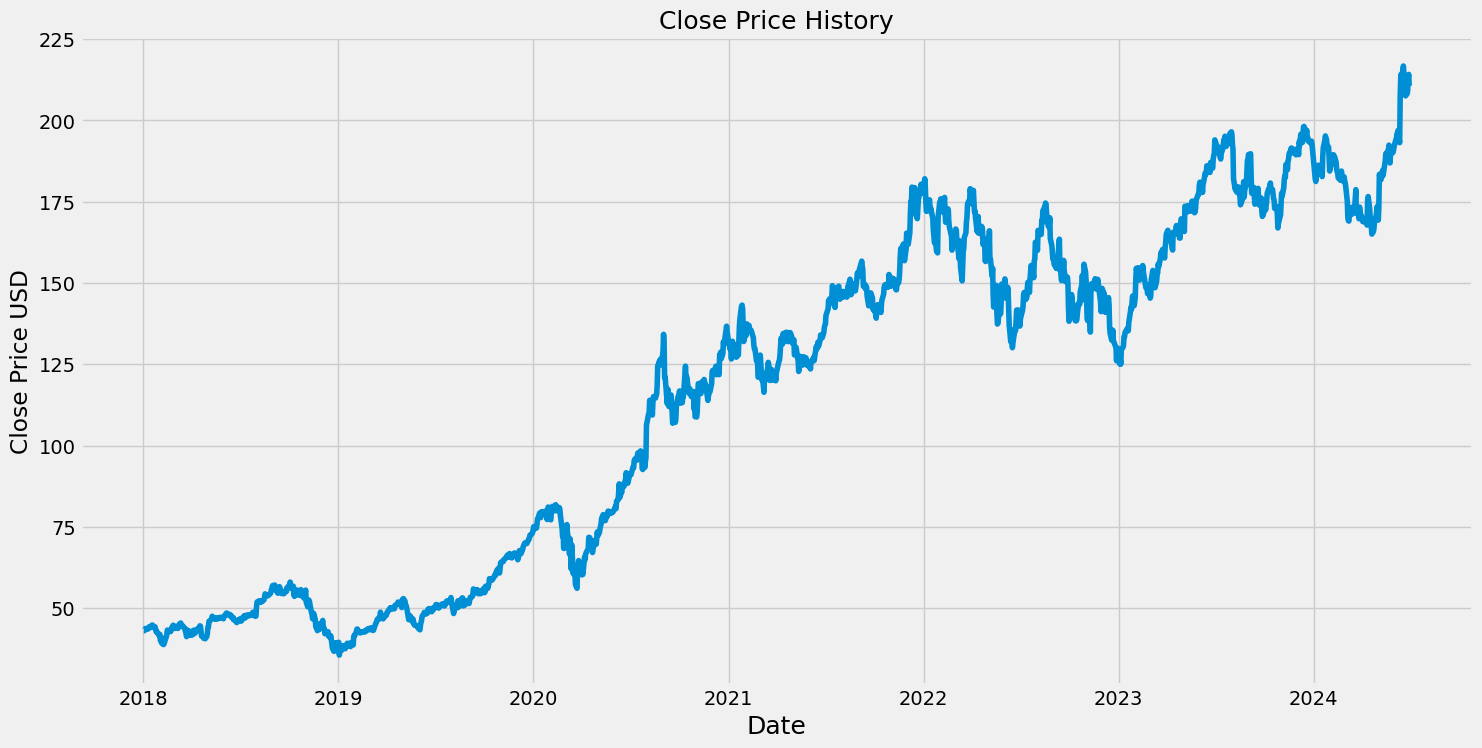

In [36]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History',fontsize=18)
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD')

plt.show()

In [37]:
moving_avg_100days=data.Close.rolling(100).mean()

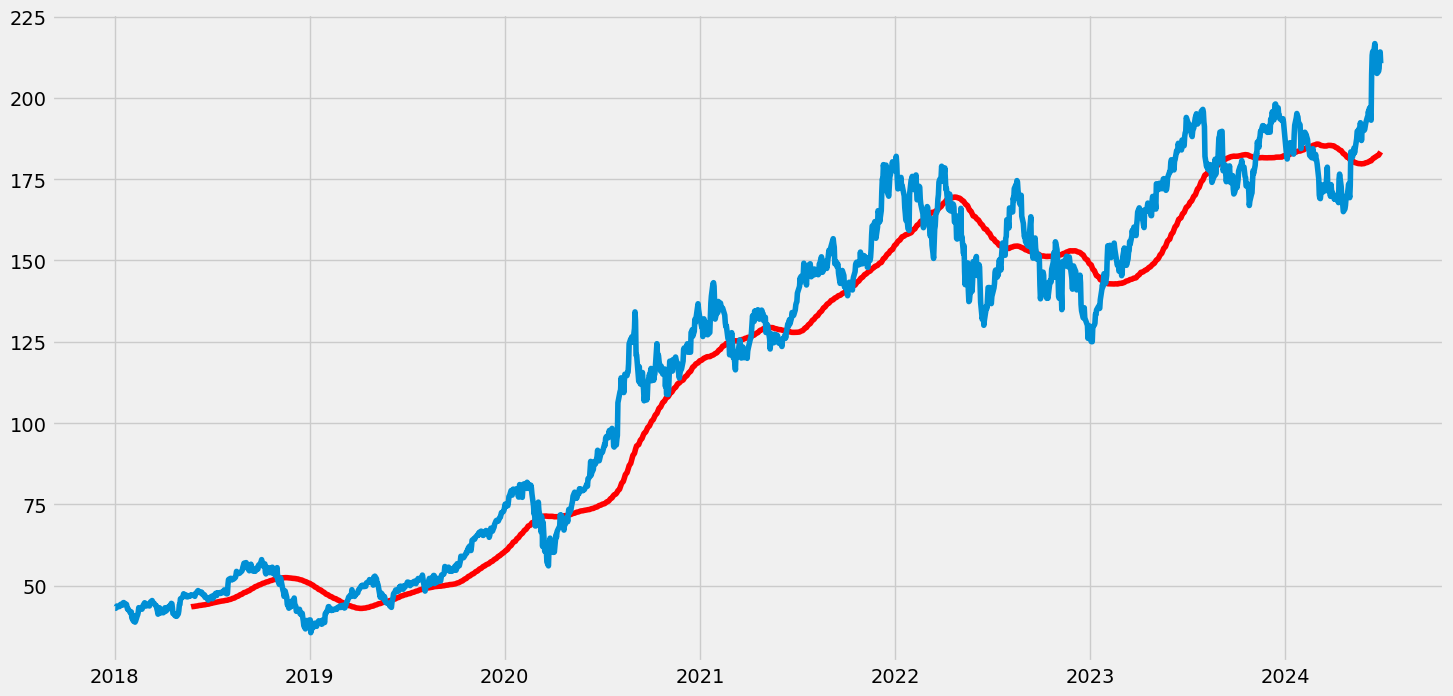

In [38]:
plt.figure(figsize=(16,8))
plt.plot(moving_avg_100days,"red")
plt.plot(data.Close,"")
plt.show()

In [39]:
moving_avg_200days=data.Close.rolling(200).mean()

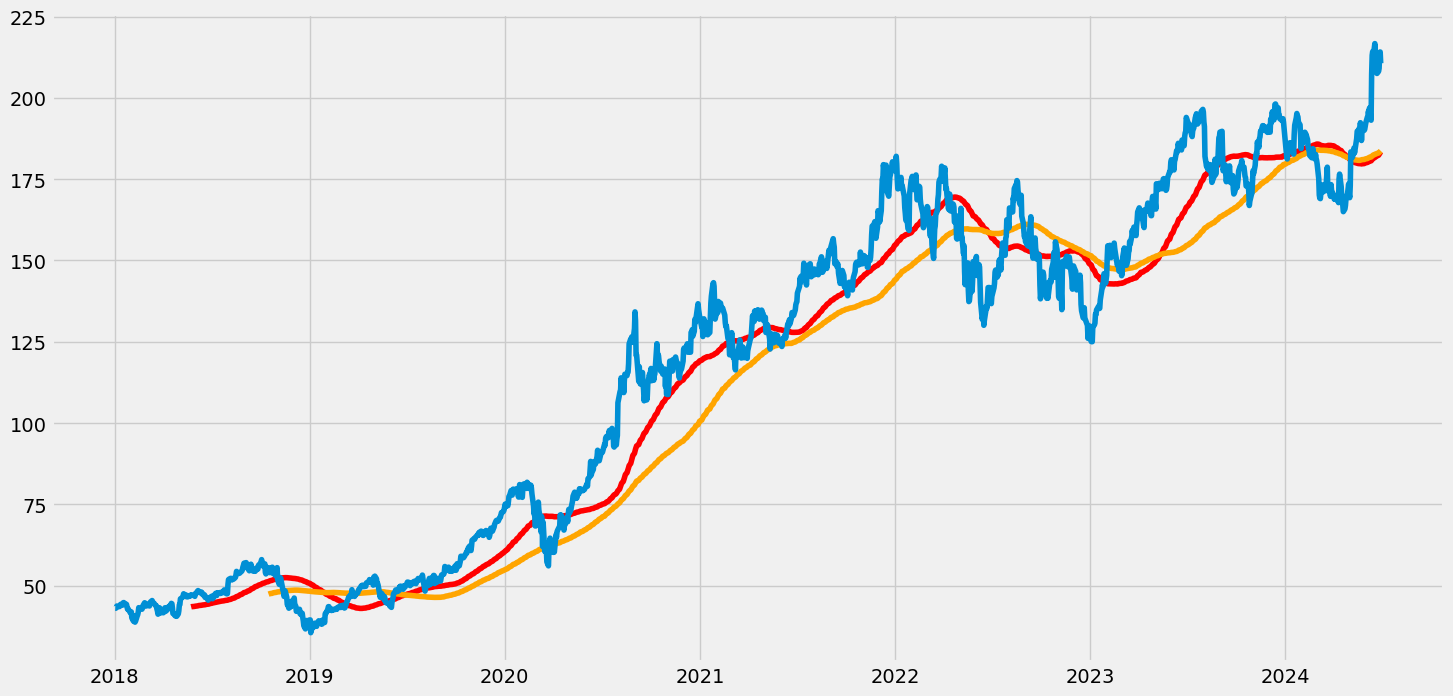

In [40]:
plt.figure(figsize=(16,8))
plt.plot(moving_avg_100days,"red")
plt.plot(moving_avg_200days,"orange")
plt.plot(data.Close,"")
plt.show()

In [41]:
#data.dropna(inplace=True)

In [42]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [43]:
data_train.shape[0]

1306

In [44]:
data_test.shape[0]

327

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [46]:
data_train_scale = scaler.fit_transform(data_train)

In [47]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [48]:
x, y = np.array(x), np.array(y)

In [51]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM


In [52]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [53]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [54]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 220ms/step - loss: 0.1856
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - loss: 0.0176
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 202ms/step - loss: 0.0173
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - loss: 0.0124
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - loss: 0.0107
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - loss: 0.0093
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - loss: 0.0082
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - loss: 0.0103
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - loss: 0.0087
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step - loss: 0.0103
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - loss: 0.0081
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 347ms/step - loss: 0.0078
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 349ms/step - loss: 0.0081
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 292ms/step - loss: 0.0075
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 228ms/st

In [55]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [56]:
pas_100_days = data_train.tail(100)

In [57]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [58]:
data_test_scale  =  scaler.fit_transform(data_test)

In [59]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [60]:
# Predicting the values
y_predict = model.predict(x)

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step


In [61]:
# Rescale back to original values
scale = 1/scaler.scale_

In [62]:
y_predict = y_predict*scale

In [63]:
y = y*scale

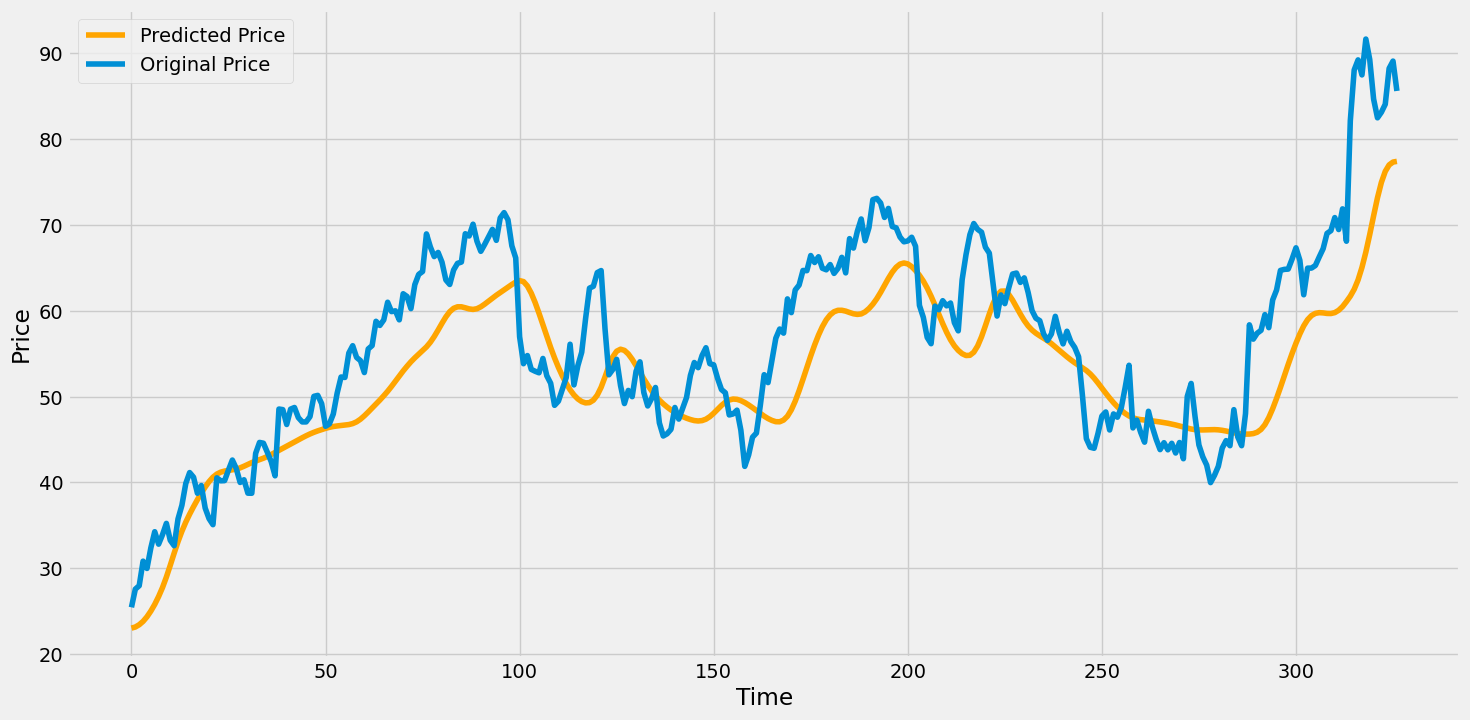

In [64]:
plt.figure(figsize=(16,8))
plt.plot(y_predict, 'orange', label = 'Predicted Price')
plt.plot(y, '', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [65]:
def calculate_supertrend(data, period, multiplier):
    high = data['High']
    low = data['Low']
    close = data['Close']
    
    tr = pd.DataFrame(index=data.index)
    tr['tr0'] = abs(high - low)
    tr['tr1'] = abs(high - close.shift(1))
    tr['tr2'] = abs(low - close.shift(1))
    tr['TR'] = tr[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = tr['TR'].rolling(period).mean()
    
    hl2 = (high + low) / 2
    upperband = hl2 - (multiplier * atr)
    lowerband = hl2 + (multiplier * atr)
    
    final_upperband = upperband.copy()
    final_lowerband = lowerband.copy()
    
    supertrend = [True] * len(data)
    
    for i in range(1, len(data.index)):
        if close[i] > final_upperband[i-1]:
            supertrend[i] = True
        elif close[i] < final_lowerband[i-1]:
            supertrend[i] = False
        else:
            supertrend[i] = supertrend[i-1]
            if supertrend[i] and final_lowerband[i] < final_lowerband[i-1]:
                final_lowerband[i] = final_lowerband[i-1]
            if not supertrend[i] and final_upperband[i] > final_upperband[i-1]:
                final_upperband[i] = final_upperband[i-1]
                
        if supertrend[i]:
            final_upperband[i] = np.nan
        else:
            final_lowerband[i] = np.nan
            
    return pd.Series(supertrend, index=data.index), final_upperband, final_lowerband

# Calculate Supertrend
period = 10
multiplier = 3.0
supertrend, final_upperband, final_lowerband = calculate_supertrend(data, period, multiplier)
data['Supertrend'] = supertrend
data['Final Upperband'] = final_upperband
data['Final Lowerband'] = final_lowerband


C:\Users\me\AppData\Local\Temp\ipykernel_10108\3250344344.py:23: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\me\AppData\Local\Temp\ipykernel_10108\3250344344.py:25: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\me\AppData\Local\Temp\ipykernel_10108\3250344344.py:29: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\me\AppData\Local\Temp\ipykernel_10108\3250344344.py:35: FutureWarning:

Series.__setitem__ tre

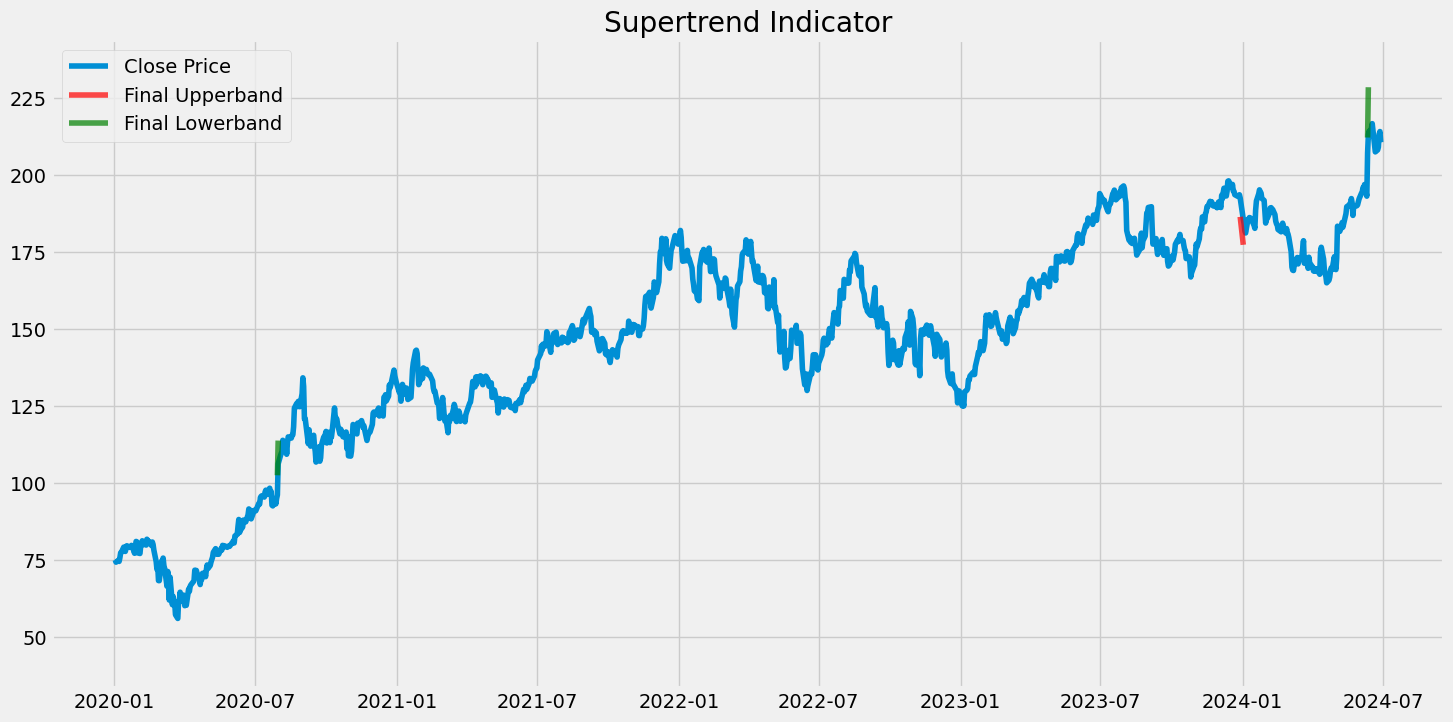

In [42]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Final Upperband'], label='Final Upperband', color='r', alpha=0.7)
plt.plot(data['Final Lowerband'], label='Final Lowerband', color='g', alpha=0.7)
plt.fill_between(data.index, data['Final Lowerband'], data['Final Upperband'], where=data['Supertrend'], color='green', alpha=0.2)
plt.fill_between(data.index, data['Final Lowerband'], data['Final Upperband'], where=~data['Supertrend'], color='red', alpha=0.2)
plt.title('Supertrend Indicator')
plt.legend(loc='best')
plt.show()


In [145]:
# Save the model
model.save('Prediction.keras')